In [1]:
import os 
import requests

pdf_path = "human-nutrition-text.pdf"

if not os.path.exists(pdf_path):
    print(f"[INFO] File doesn't exist, Downloading......")

    url="https://pressbooks.oer.hawaii.edu/humannutrition2/open/download?type=pdf"

    filename = pdf_path

    response = requests.get(url)

    if response.status_code == 200:
        with open(filename, "wb") as file:
            file.write(response.content)
        print(f"[INFO] The File has been downloaded and saved as {filename}")
    else:
        print(f"[INFO] Failed to download the file. Status code: {response.status_code}")

else:   
    print(f"File {pdf_path} exists.")

File human-nutrition-text.pdf exists.


In [2]:
import fitz
from tqdm.auto import tqdm

def text_formatter(text: str) -> str:
    """Performs minor formatting on text."""

    cleaned_text = text.replace("\n", " ").strip()

    return cleaned_text

def open_and_read_pdf(pdf_path: str) -> list[dict]:
    doc = fitz.open(pdf_path)
    pages_and_texts = []
    for page_number, page in tqdm(enumerate(doc)):
        text = page.get_text()
        text = text_formatter(text=text)
        pages_and_texts.append({"page_number": page_number - 41,
                                "page_char_count": len(text),
                                "page_word_count": len(text.split(" ")),
                                "page_sentence_count_raw": len(text.split(". ")),
                                "page_token_count": len(text) / 4,
                                "text": text})
        
    return pages_and_texts
pages_and_texts = open_and_read_pdf(pdf_path=pdf_path)
pages_and_texts[:2]

0it [00:00, ?it/s]

[{'page_number': -41,
  'page_char_count': 29,
  'page_word_count': 4,
  'page_sentence_count_raw': 1,
  'page_token_count': 7.25,
  'text': 'Human Nutrition: 2020 Edition'},
 {'page_number': -40,
  'page_char_count': 0,
  'page_word_count': 1,
  'page_sentence_count_raw': 1,
  'page_token_count': 0.0,
  'text': ''}]

In [3]:
import random

random.sample(pages_and_texts, k=3)


[{'page_number': 431,
  'page_char_count': 319,
  'page_word_count': 65,
  'page_sentence_count_raw': 1,
  'page_token_count': 79.75,
  'text': 'Image by  Allison  Calabrese /  CC BY 4.0  Introduction  UNIVERSITY OF HAWAI‘I AT MĀNOA FOOD SCIENCE AND HUMAN  NUTRITION PROGRAM AND HUMAN NUTRITION PROGRAM  Ka wai hoʻomalule kino  The liquid that causes limpness to the body  Learning Objectives  By the end of this chapter, you will be able to:  Introduction  |  431'},
 {'page_number': 950,
  'page_char_count': 1695,
  'page_word_count': 302,
  'page_sentence_count_raw': 13,
  'page_token_count': 423.75,
  'text': 'Fuel Sources  UNIVERSITY OF HAWAI‘I AT MĀNOA FOOD SCIENCE AND HUMAN  NUTRITION PROGRAM AND HUMAN NUTRITION PROGRAM  The human body uses carbohydrate, fat and protein in food and  from body stores as energy. These essential nutrients are needed  regardless of the intensity of activity you are doing. If you are lying  down reading a book or running the the Honolulu Marathon, these  

In [4]:
import pandas as pd

df = pd.DataFrame(pages_and_texts)
df.head

<bound method NDFrame.head of       page_number  page_char_count  page_word_count  page_sentence_count_raw  \
0             -41               29                4                        1   
1             -40                0                1                        1   
2             -39              320               54                        1   
3             -38              212               32                        1   
4             -37              797              147                        3   
...           ...              ...              ...                      ...   
1203         1162             1676              268                       18   
1204         1163             1617              262                       10   
1205         1164             1715              273                       13   
1206         1165             1733              275                       13   
1207         1166              257               46                        3   

      pag

In [5]:
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count
count,1208.00,1208.00,1208.00,1208.00,1208.00
mean,562.50,1148.00,199.50,10.52,287.00
std,348.86,560.38,95.83,6.55,140.10
min,-41.00,0.00,1.00,1.00,0.00
25%,260.75,762.00,134.00,5.00,190.50
50%,562.50,1231.50,216.00,10.00,307.88
75%,864.25,1603.50,272.00,15.00,400.88
max,1166.00,2308.00,430.00,39.00,577.00


In [6]:
from spacy.lang.en import English

nlp = English()

nlp.add_pipe("sentencizer")

doc = nlp("This is a sentence. This is another sentence. I like elephants.")
assert len(list(doc.sents)) == 3

list(doc.sents)



[This is a sentence., This is another sentence., I like elephants.]

In [7]:
pages_and_texts[600]

{'page_number': 559,
 'page_char_count': 863,
 'page_word_count': 138,
 'page_sentence_count_raw': 9,
 'page_token_count': 215.75,
 'text': 'Image by  Allison  Calabrese /  CC BY 4.0  Korsakoff syndrome can cause similar symptoms as beriberi such  as confusion, loss of coordination, vision changes, hallucinations,  and may progress to coma and death. This condition is specific  to alcoholics as diets high in alcohol can cause thiamin deficiency.  Other individuals at risk include individuals who also consume diets  typically low in micronutrients such as those with eating disorders,  elderly, and individuals who have gone through gastric bypass  surgery.5  Figure 9.10 The Role of Thiamin  Figure 9.11 Beriberi, Thiamin Deficiency  5. Fact Sheets for Health Professionals: Thiamin. National  Institute of Health, Office of Dietary Supplements.   https://ods.od.nih.gov/factsheets/Thiamin- HealthProfessional/. Updated Feburary 11, 2016.  Accessed October 22, 2017.  Water-Soluble Vitamins  | 

In [8]:
for item in tqdm(pages_and_texts):
    item["sentences"] = list(nlp(item["text"]).sents)

    item["sentences"] = [str(sentence) for sentence in item["sentences"]]

    item["page_sentence_count_spacy"] = len(item["sentences"])


  0%|          | 0/1208 [00:00<?, ?it/s]

In [9]:
random.sample(pages_and_texts, k=1)

[{'page_number': 172,
  'page_char_count': 1789,
  'page_word_count': 316,
  'page_sentence_count_raw': 9,
  'page_token_count': 447.25,
  'text': 'Electrolytes Important for  Fluid Balance  UNIVERSITY OF HAWAI‘I AT MĀNOA FOOD SCIENCE AND HUMAN  NUTRITION PROGRAM AND HUMAN NUTRITION PROGRAM  Cells are about 75 percent water and blood plasma is about 95  percent water. Why then, does the water not flow from blood  plasma to cells? The force of water also known as hydrostatic  pressure  maintains  the  volumes  of  water  between  fluid  compartments against the force of all dissolved substances. The  concentration is the amount of particles in a set volume of water.  (Recall that individual solutes can differ in concentration between  the intracellular and extracellular fluids, but the total concentration  of all dissolved substances is equal.)  The force driving the water movement through the selectively  permeable membrane is the higher solute concentration on the  one side. Solutes a

In [10]:
df = pd.DataFrame(pages_and_texts)
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,page_sentence_count_spacy
count,1208.00,1208.00,1208.00,1208.00,1208.00,1208.00
mean,562.50,1148.00,199.50,10.52,287.00,10.32
std,348.86,560.38,95.83,6.55,140.10,6.30
min,-41.00,0.00,1.00,1.00,0.00,0.00
25%,260.75,762.00,134.00,5.00,190.50,5.00
50%,562.50,1231.50,216.00,10.00,307.88,10.00
75%,864.25,1603.50,272.00,15.00,400.88,15.00
max,1166.00,2308.00,430.00,39.00,577.00,28.00


In [11]:
num_sentence_chunk_size = 10

def split_list(input_list: list[str],
               slice_size: int=num_sentence_chunk_size) -> list[list[str]]:
    return [input_list[i:i+slice_size] for i in range(0, len(input_list),slice_size)]

test_list = list(range(25))
split_list(test_list)


[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [20, 21, 22, 23, 24]]

In [12]:
for item in tqdm(pages_and_texts):
    item["sentence_chunks"] = split_list(input_list=item["sentences"],
                                         slice_size=num_sentence_chunk_size)
    item["num_chunks"] = len(item["sentence_chunks"])

  0%|          | 0/1208 [00:00<?, ?it/s]

In [13]:
random.sample(pages_and_texts, k=1)

[{'page_number': 279,
  'page_char_count': 1894,
  'page_word_count': 298,
  'page_sentence_count_raw': 13,
  'page_token_count': 473.5,
  'text': 'Benefits of Sugar Substitutes  Consuming foods and beverages containing sugar substitutes may  benefit health by reducing the consumption of simple sugars, which  are higher in calories, cause tooth decay, and are potentially linked  to chronic disease. Artificial sweeteners are basically non-nutrients  though not all are completely calorie-free. However, because they  are so intense in sweetness they are added in very small amounts  to foods and beverages. Artificial sweeteners and sugar alcohols are  not “fermentable sugars” and therefore they do not cause tooth  decay. Chewing gum with artificial sweeteners is the only proven  way that artificial sweeteners promote oral health. The American  Dental Association (ADA) allows manufacturers of chewing gum to  label packages with an ADA seal if they have convincing scientific  evidence demons

In [14]:
df = pd.DataFrame(pages_and_texts)
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,page_sentence_count_spacy,num_chunks
count,1208.00,1208.00,1208.00,1208.00,1208.00,1208.00,1208.00
mean,562.50,1148.00,199.50,10.52,287.00,10.32,1.53
std,348.86,560.38,95.83,6.55,140.10,6.30,0.64
min,-41.00,0.00,1.00,1.00,0.00,0.00,0.00
25%,260.75,762.00,134.00,5.00,190.50,5.00,1.00
50%,562.50,1231.50,216.00,10.00,307.88,10.00,1.00
75%,864.25,1603.50,272.00,15.00,400.88,15.00,2.00
max,1166.00,2308.00,430.00,39.00,577.00,28.00,3.00


In [15]:
import re
pages_and_chunks = []
for item in tqdm(pages_and_texts):
    for sentence_chunk in item["sentence_chunks"]:
        chunk_dict = {}
        chunk_dict["page_number"] = item["page_number"]

        joined_sentence_chunk = "".join(sentence_chunk).replace(" "," ").strip()
        joined_sentence_chunk = re.sub(r'\.([A-Z])', r'. \1', joined_sentence_chunk)

        chunk_dict["sentence_chunk"] = joined_sentence_chunk

        chunk_dict["chunk_char_count"] = len(joined_sentence_chunk)
        chunk_dict["chunk_word_count"] = len([word for word in joined_sentence_chunk.split(" ")])
        chunk_dict["chunk_token_count"] = len(joined_sentence_chunk) / 4

        pages_and_chunks.append(chunk_dict)

len(pages_and_chunks)

  0%|          | 0/1208 [00:00<?, ?it/s]

1843

In [16]:
random.sample(pages_and_chunks, k=1)

[{'page_number': 830,
  'sentence_chunk': 'LaFleur, E. (2019, July 3). Breast-feeding and alcohol: Is it  okay to drink?. Mayo Clinic. http://www.mayoclinic.com/health/breast-feeding- and-alcohol/AN02131. 20. American Academy of Pediatrics. (2016, August 8). Breastfeeding benefits your baby’s immune system. http://www.healthychildren.org/English/ages-stages/ baby/breastfeeding/pages/Breastfeeding-Benefits- Your-Baby%27s-Immune-System.aspx  830  |  Infancy',
  'chunk_char_count': 416,
  'chunk_word_count': 41,
  'chunk_token_count': 104.0}]

In [17]:
df = pd.DataFrame(pages_and_chunks)
df.describe().round(2)

,page_number,chunk_char_count,chunk_word_count,chunk_token_count
count,1843.00,1843.00,1843.00,1843.00
mean,583.38,749.91,128.55,187.48
std,347.79,455.68,80.01,113.92
min,-41.00,14.00,4.00,3.50
25%,280.50,321.50,53.00,80.38
50%,586.00,762.00,132.00,190.50
75%,890.00,1137.50,195.00,284.38
max,1166.00,1870.00,415.00,467.50


In [18]:
df.head()

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count
0,-41,Human Nutrition: 2020 Edition,29,4,7.25
1,-39,Human Nutrition: 2020 Edition UNIVERSITY OF ...,320,54,80.00
2,-38,Human Nutrition: 2020 Edition by University of...,212,32,53.00
3,-37,Contents Preface University of Hawai‘i at Mā...,797,147,199.25
4,-36,Lifestyles and Nutrition University of Hawai‘...,976,179,244.00


In [19]:
min_token_length = 30
for row in df[df["chunk_token_count"] <= min_token_length].sample(5).iterrows():
    print(f'chunk token count: {row[1]["chunk_token_count"]} | Text: {row[1]["sentence_chunk"]}')

chunk token count: 11.0 | Text: The Major Types of Foodborne Illness  |  993
chunk token count: 21.5 | Text: Centers for Disease Control  and Prevention.http://www.cdc.gov/nutrition/ Iron  |  661
chunk token count: 20.0 | Text: The function of the anticoagulant drug warfarin is  544  |  Fat-Soluble Vitamins
chunk token count: 25.0 | Text: There are several lecithin supplements on the market  Nonessential and Essential Fatty Acids  |  315
chunk token count: 25.5 | Text: Journal of the American  Dietetic Association.105(6), 929-36. Calories In Versus Calories Out  |  1071


In [20]:
pages_and_chunks_over_min_token_len = df[df["chunk_token_count"] > min_token_length].to_dict(orient="records")
pages_and_chunks_over_min_token_len[:2]

[{'page_number': -39,
  'sentence_chunk': 'Human Nutrition: 2020  Edition  UNIVERSITY OF HAWAI‘I AT MĀNOA  FOOD SCIENCE AND HUMAN  NUTRITION PROGRAM  ALAN TITCHENAL, SKYLAR HARA,  NOEMI ARCEO CAACBAY, WILLIAM  MEINKE-LAU, YA-YUN YANG, MARIE  KAINOA FIALKOWSKI REVILLA,  JENNIFER DRAPER, GEMADY  LANGFELDER, CHERYL GIBBY, CHYNA  NICOLE CHUN, AND ALLISON  CALABRESE',
  'chunk_char_count': 320,
  'chunk_word_count': 54,
  'chunk_token_count': 80.0},
 {'page_number': -38,
  'sentence_chunk': 'Human Nutrition: 2020 Edition by University of Hawai‘i at Mānoa Food Science and  Human Nutrition Program is licensed under a Creative Commons Attribution 4.0  International License, except where otherwise noted.',
  'chunk_char_count': 212,
  'chunk_word_count': 32,
  'chunk_token_count': 53.0}]

In [21]:
random.sample(pages_and_chunks_over_min_token_len, k=1)

[{'page_number': 1003,
  'sentence_chunk': 'Centers for Disease Control and Prevention. (2010). “Parasites.”Last updated November 2, 2010. http://www.cdc.gov/parasites/food.html. The Causes of Food Contamination  |  1003',
  'chunk_char_count': 176,
  'chunk_word_count': 22,
  'chunk_token_count': 44.0}]

In [22]:
from sentence_transformers import SentenceTransformer
embedding_model = SentenceTransformer(model_name_or_path="all-mpnet-base-v2",
                                      device="cpu")

sentences = ["The Sentence Transformer library provides an easy way to create embeddings",
             "Sentences can be embedded one by one or in a list",
             "I like horses!"]

embeddings = embedding_model.encode(sentences)
embeddings_dict = dict(zip(sentences, embeddings))


for sentence, embedding in embeddings_dict.items():
    print(f"Sentence: {sentence}")
    print(f"Embedding: {embedding}")
    print("")


c:\Users\Anshul Banda\Desktop\RAG\NewVideo\.venv\Lib\site-packages\huggingface_hub\file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\Anshul Banda\Desktop\RAG\NewVideo\.venv\Lib\site-packages\huggingface_hub\file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Sentence: The Sentence Transformer library provides an easy way to create embeddings
Embedding: [-3.17512564e-02  3.37267965e-02 -2.52437480e-02  5.22287600e-02
 -2.35249400e-02 -6.19120477e-03  1.35026230e-02 -6.25500828e-02
  7.50827696e-03 -2.29684655e-02  2.98146587e-02  4.57554460e-02
 -3.26700173e-02  1.39847687e-02  4.18013446e-02 -5.92969656e-02
  4.26310077e-02  5.04656602e-03 -2.44552698e-02  3.98593023e-03
  3.55898067e-02  2.78742202e-02  1.84098948e-02  3.67699936e-02
 -2.29961127e-02 -3.01797260e-02  5.99547930e-04 -3.64503972e-02
  5.69104776e-02 -7.49944523e-03 -3.70003879e-02 -3.04357917e-03
  4.64354940e-02  2.36151577e-03  9.06849777e-07  7.00039044e-03
 -3.92290018e-02 -5.95695758e-03  1.38653535e-02  1.87111972e-03
  5.34202866e-02 -6.18613437e-02  2.19613146e-02  4.86050844e-02
 -4.25697453e-02 -1.69858299e-02  5.04178256e-02  1.54733974e-02
  8.12860206e-02  5.07106259e-02 -2.27497146e-02 -4.35720757e-02
 -2.18383269e-03 -2.14091744e-02 -2.01758090e-02  3.0683243

In [23]:
embeddings[0].shape

(768,)

In [24]:
embedding = embedding_model.encode("My favourite animal is the cow!")
embedding

array([-1.45473592e-02,  7.66727254e-02, -2.85872295e-02, -3.31283323e-02,
        3.65210623e-02,  4.78570722e-02, -7.08107650e-02,  1.62834115e-02,
        1.93443578e-02, -2.80482210e-02, -2.91746985e-02,  5.11310101e-02,
       -3.28720249e-02, -8.98758043e-03, -1.03672612e-02, -3.15488353e-02,
        4.22783941e-02, -9.13281739e-03, -1.94017384e-02,  4.35689166e-02,
       -2.31997799e-02,  4.29883189e-02, -1.72393620e-02, -2.01372448e-02,
       -3.13574336e-02,  8.08168482e-03, -2.06725318e-02, -2.27869470e-02,
        2.44812835e-02,  1.71967912e-02, -6.26672581e-02, -7.54797161e-02,
        3.57422121e-02, -5.46569051e-03,  1.24730343e-06, -7.63203343e-03,
       -3.53222340e-02,  1.91327129e-02,  3.99045646e-02,  2.11730343e-03,
        1.64565984e-02,  9.84052476e-03, -1.80700570e-02,  9.33834538e-03,
        3.23482789e-02,  5.84785193e-02,  4.23187539e-02,  1.62091162e-02,
       -9.14911479e-02,  1.82304922e-02, -5.25728893e-03, -7.81019405e-03,
       -3.47644351e-02, -

In [25]:
%%time

#embedding_model.to("cpu")

#for item in tqdm(pages_and_chunks_over_min_token_len):
   #item["embedding"] = embedding_model.encode(item["sentence_chunk"])

CPU times: total: 0 ns
Wall time: 0 ns


In [26]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))


2.6.0+cu126
True
1
NVIDIA GeForce RTX 3050 Ti Laptop GPU


In [27]:
%%time

embedding_model.to("cuda")

for item in tqdm(pages_and_chunks_over_min_token_len):
    item["embedding"] = embedding_model.encode(item["sentence_chunk"])

  0%|          | 0/1685 [00:00<?, ?it/s]

CPU times: total: 14min 30s
Wall time: 1min 56s


In [28]:
%%time

text_chunks = [item["sentence_chunk"] for item in pages_and_chunks_over_min_token_len]
text_chunks[419]

CPU times: total: 0 ns
Wall time: 0 ns


'Personal Choices  Carbohydrates are in most foods so you have a great variety of  choices with which to meet the carbohydrates recommendations  for a healthy diet. The 2010 Dietary Guidelines recommends eating  more unrefined carbohydrates and more fiber, and reducing  consumption of foods that are high in added sugars. To accomplish  these recommendations use some or all of the following  suggestions:  • Get more daily carbohydrate servings from whole grains by  eating a whole-grain cereal for breakfast, using whole-grain  bread to make a sandwich for lunch, and eating a serving of  beans and/or nuts with dinner. • Make sure to get at least three servings (or more) of all the  grains you eat as whole grains every day. A serving of whole  grains is equal to one slice of whole-wheat bread, one ounce of  whole-grain cereal, and one-half cup of cooked cereal, brown  rice, or whole-wheat pasta. Food products made with cornmeal use the whole grain so  choose tortillas, corn cereals, and co

In [29]:
len(text_chunks)

1685

In [30]:
%%time

text_chunk_embeddings = embedding_model.encode(text_chunks,
                                                batch_size=32,
                                                convert_to_tensor=True)

text_chunk_embeddings

CPU times: total: 1min 45s
Wall time: 34.5 s


tensor([[ 0.0674,  0.0902, -0.0051,  ..., -0.0221, -0.0232,  0.0126],
        [ 0.0552,  0.0592, -0.0166,  ..., -0.0120, -0.0103,  0.0227],
        [ 0.0280,  0.0340, -0.0206,  ..., -0.0054,  0.0213,  0.0313],
        ...,
        [ 0.0771,  0.0098, -0.0122,  ..., -0.0409, -0.0752, -0.0241],
        [ 0.1030, -0.0165,  0.0083,  ..., -0.0574, -0.0283, -0.0295],
        [ 0.0864, -0.0125, -0.0113,  ..., -0.0522, -0.0337, -0.0299]],
       device='cuda:0')

In [31]:
pages_and_chunks_over_min_token_len[419]

{'page_number': 276,
 'sentence_chunk': 'Personal Choices  Carbohydrates are in most foods so you have a great variety of  choices with which to meet the carbohydrates recommendations  for a healthy diet. The 2010 Dietary Guidelines recommends eating  more unrefined carbohydrates and more fiber, and reducing  consumption of foods that are high in added sugars. To accomplish  these recommendations use some or all of the following  suggestions:  • Get more daily carbohydrate servings from whole grains by  eating a whole-grain cereal for breakfast, using whole-grain  bread to make a sandwich for lunch, and eating a serving of  beans and/or nuts with dinner. • Make sure to get at least three servings (or more) of all the  grains you eat as whole grains every day. A serving of whole  grains is equal to one slice of whole-wheat bread, one ounce of  whole-grain cereal, and one-half cup of cooked cereal, brown  rice, or whole-wheat pasta. Food products made with cornmeal use the whole grain so

In [32]:
text_chunks_and_embeddings_df = pd.DataFrame(pages_and_chunks_over_min_token_len)
embeddings_df_save_path = "text_chunks_and_embeddings_df.csv"
text_chunks_and_embeddings_df.to_csv(embeddings_df_save_path, index=False)

In [33]:
text_chunks_and_embeddings_df_load = pd.read_csv(embeddings_df_save_path)
text_chunks_and_embeddings_df_load.head()

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,-39,Human Nutrition: 2020 Edition UNIVERSITY OF ...,320,54,80.00,[ 6.74242899e-02 9.02281702e-02 -5.09548699e-...
1,-38,Human Nutrition: 2020 Edition by University of...,212,32,53.00,[ 5.52156121e-02 5.92139401e-02 -1.66167337e-...
2,-37,Contents Preface University of Hawai‘i at Mā...,797,147,199.25,[ 2.79801823e-02 3.39813717e-02 -2.06426494e-...
3,-36,Lifestyles and Nutrition University of Hawai‘...,976,179,244.00,[ 6.82566687e-02 3.81275155e-02 -8.46854225e-...
4,-35,The Cardiovascular System University of Hawai...,1037,191,259.25,[ 3.30264382e-02 -8.49764794e-03 9.57158674e-...


In [34]:
import random

import torch

import numpy as np

import pandas as pd

device = "cuda" if torch.cuda.is_available() else "cpu"

text_chunks_and_embedding_df = pd.read_csv("text_chunks_and_embeddings_df.csv")

text_chunks_and_embedding_df["embedding"] = text_chunks_and_embedding_df["embedding"].apply(lambda x: np.fromstring(x.strip("[]"), sep=" "))

embeddings = torch.tensor(np.stack(text_chunks_and_embedding_df["embedding"].tolist(), axis=0), dtype=torch.float32).to(device)

pages_and_chunks = text_chunks_and_embedding_df.to_dict(orient="records")

text_chunks_and_embedding_df


,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,-39,Human Nutrition: 2020 Edition UNIVERSITY OF ...,320,54,80.00,"[0.0674242899, 0.0902281702, -0.00509548699, -..."
1,-38,Human Nutrition: 2020 Edition by University of...,212,32,53.00,"[0.0552156121, 0.0592139401, -0.0166167337, -0..."
2,-37,Contents Preface University of Hawai‘i at Mā...,797,147,199.25,"[0.0279801823, 0.0339813717, -0.0206426494, 0...."
3,-36,Lifestyles and Nutrition University of Hawai‘...,976,179,244.00,"[0.0682566687, 0.0381275155, -0.00846854225, -..."
4,-35,The Cardiovascular System University of Hawai...,1037,191,259.25,"[0.0330264382, -0.00849764794, 0.00957158674, ..."
...,...,...,...,...,...,...
1680,1164,Flashcard Images Note: Most images in the fla...,1329,211,332.25,"[0.0185622647, -0.0164277647, -0.0127045522, -..."
1681,1164,Hazard Analysis Critical Control Points reused...,383,60,95.75,"[0.0334720463, -0.0570441, 0.0151489321, -0.01..."
1682,1165,ShareAlike 11. Organs reused “Pancreas Organ ...,1312,202,328.00,"[0.0770515725, 0.0097855879, -0.0121817486, 0...."
1683,1165,Sucrose reused “Figure 03 02 05” by OpenStax B...,420,73,105.00,"[0.103045173, -0.016470151, 0.00826843642, 0.0..."


In [35]:
embeddings.shape

torch.Size([1685, 768])

In [36]:
from sentence_transformers import util, SentenceTransformer

embedding_model = SentenceTransformer(model_name_or_path="all-mpnet-base-v2",
                                      device=device)

c:\Users\Anshul Banda\Desktop\RAG\NewVideo\.venv\Lib\site-packages\huggingface_hub\file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [37]:
query = "good foods for protein"
print(f"Query: {query}")

query_embedding = embedding_model.encode(query, convert_to_tensor=True).to("cuda")

from time import perf_counter as timer

start_time = timer()
dot_scores = util.dot_score(a=query_embedding
                            , b=embeddings)[0]
end_time = timer()

print(f"[INFO] Time taken to get scores on {len(embeddings)} embeddings: {end_time-start_time: .5f} seconds.")

top_results_dot_product = torch.topk(dot_scores, k=5)
top_results_dot_product


Query: good foods for protein
[INFO] Time taken to get scores on 1685 embeddings:  0.00094 seconds.


torch.return_types.topk(
values=tensor([0.7729, 0.7647, 0.6743, 0.6743, 0.6634], device='cuda:0'),
indices=tensor([614, 619, 618, 623, 620], device='cuda:0'))

In [38]:
larger_embeddings = torch.randn(100*embeddings.shape[0], 768).to(device)
print(f"Embeddings shape: {larger_embeddings.shape}")

start_time = timer()
dot_scores = util.dot_score(a=query_embedding
                            , b=larger_embeddings)[0]
end_time = timer()

print(f"[INFO] Time taken to get scores on {len(larger_embeddings)} embeddings: {end_time-start_time: .5f} seconds.")

Embeddings shape: torch.Size([168500, 768])
[INFO] Time taken to get scores on 168500 embeddings:  0.01117 seconds.


In [39]:
import textwrap

def print_wrapped(text, wrap_length=80):
    wrapped_text = textwrap.fill(text, wrap_length)
    print(wrapped_text)

In [40]:
query = "good foods for protein"
print(f"Query: '{query}'\n")
print("Results:")
for score, idx in zip(top_results_dot_product[0], top_results_dot_product[1]):
    print(f"Score: {score:.4f}")
    print("Text:")
    print_wrapped(pages_and_chunks[idx]["sentence_chunk"])
    print(f"Page number: {pages_and_chunks[idx]['page_number']}")
    print("\n")

Query: 'good foods for protein'

Results:
Score: 0.7729
Text:
Dietary Sources of Protein  The protein food group consists of foods made from
meat, seafood,  poultry, eggs, soy, dry beans, peas, and seeds. According to the
Harvard School of Public Health, “animal protein and vegetable  protein probably
have the same effects on health. It’s the protein  package that’s likely to make
a difference.”1  1. Protein: The Bottom Line. Harvard School of Public
Proteins, Diet, and Personal Choices  |  411
Page number: 411


Score: 0.7647
Text:
Additionally, a person should consume 8 ounces of cooked seafood  every week
(typically as two 4-ounce servings) to assure they are  getting the healthy
omega-3 fatty acids that have been linked to a  lower risk for heart disease.
Another tip is choosing to eat dry beans,  peas, or soy products as a main dish.
Some of the menu choices  include chili with kidney and pinto beans, hummus on
pita bread,  and black bean enchiladas. You could also enjoy nuts in a

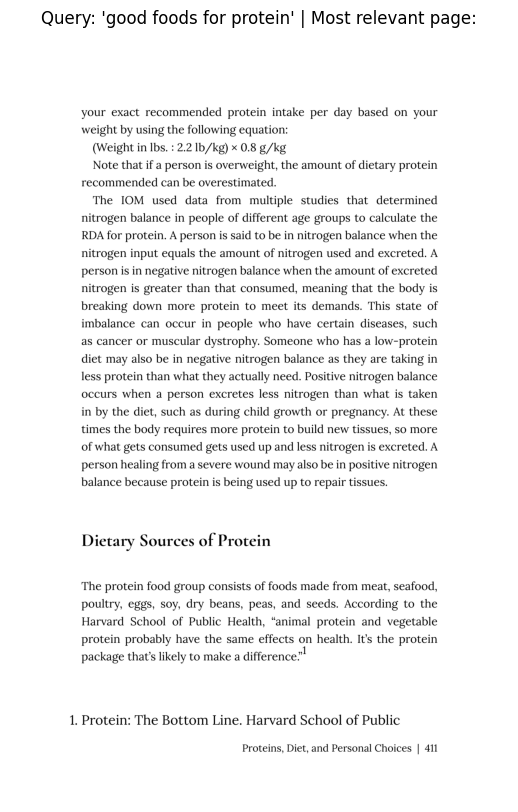

In [41]:
import fitz
pdf_path = "human-nutrition-text.pdf"
doc = fitz.open(pdf_path)

page = doc.load_page(411+41)

img = page.get_pixmap(dpi=300)

#save image(optional)
#img.save("output_filename.png")

doc.close()

img_array = np.frombuffer(img.samples_mv,
                          dtype=np.uint8).reshape((img.h, img.w, img.n))

import matplotlib.pyplot as plt
plt.figure(figsize=(13, 10))
plt.imshow(img_array)
plt.title(f"Query: '{query}' | Most relevant page:")
plt.axis("off")
plt.show()

In [42]:
import torch
def dot_product(vector1, vector2):
    return torch.dot(vector1, vector2)


def cosine_similarity(vector1, vector2):
    dot_product = torch.dot(vector1, vector2)

    norm_vector1 = torch.sqrt(torch.sum(vector1**2))
    norm_vector2 = torch.sqrt(torch.sum(vector2**2))

    return dot_product / (norm_vector1 * norm_vector2)

vector1 = torch.tensor([1, 2, 3], dtype=torch.float32)
vector2 = torch.tensor([1, 2, 3], dtype=torch.float32)
vector3 = torch.tensor([4, 5, 6], dtype=torch.float32)
vector4 = torch.tensor([-1, -2, -3], dtype=torch.float32)


print("Dot product between vector1 and  vector2:", dot_product(vector1, vector2))
print("Dot product between vector1 and  vector3:", dot_product(vector1, vector3))
print("Dot product between vector1 and  vector4:", dot_product(vector1, vector4))

print("Cosine similarity between vector1 and vector2:", cosine_similarity(vector1, vector2))
print("Cosine similarity between vector1 and vector3:", cosine_similarity(vector1, vector3))
print("Cosine similarity between vector1 and vector4:", cosine_similarity(vector1, vector4))




Dot product between vector1 and  vector2: tensor(14.)
Dot product between vector1 and  vector3: tensor(32.)
Dot product between vector1 and  vector4: tensor(-14.)
Cosine similarity between vector1 and vector2: tensor(1.0000)
Cosine similarity between vector1 and vector3: tensor(0.9746)
Cosine similarity between vector1 and vector4: tensor(-1.0000)


In [43]:
def retrieve_relevant_resources(query: str,
                      embeddings: torch.tensor,
                      model: SentenceTransformer=embedding_model,
                      n_resources_to_return: int=5,
                      print_time: bool=True):
    """Embeds a query with model and return top k scores and indices from embeddings"""

    query_embedding = model.encode(query, convert_to_tensor=True)

    start_time = timer()
    dot_score = util.dot_score(query_embedding, embeddings)[0]
    end_time = timer()

    if print_time:
        print(f"[INFO] Time taken to get scores on ({len(embeddings)} embeddings: {end_time-start_time:.5f} seconds.")

    scores, indices = torch.topk(input=dot_score,  # Fixed: changed from dot_scores to dot_score
                                k=n_resources_to_return)
    
    return scores, indices

def print_top_results_and_scores(query: str,
                                embeddings: torch.tensor,
                                pages_and_chunks: list[dict]=pages_and_chunks,
                                n_resources_to_return: int=5):
    """ Finds relevant passages given a query and prints them out along with thier scores."""

    scores, indices = retrieve_relevant_resources(query=query,  # Fixed: changed from retrieve__relevant_resources (removed double underscore)
                                                embeddings=embeddings,
                                                n_resources_to_return=n_resources_to_return)
    for score, idx in zip(scores, indices):
        print(f"Score: {score:.4f}")
        print("Text:")
        print_wrapped(pages_and_chunks[idx]["sentence_chunk"])
        print(f"Page number: {pages_and_chunks[idx]['page_number']}")
        print("\n")

In [44]:
query="foods high in fiber"
#retrieve_relevant_resources(query=query, embeddings=embeddings)
print_top_results_and_scores(query=query, embeddings=embeddings)

[INFO] Time taken to get scores on (1685 embeddings: 0.00016 seconds.
Score: 0.6964
Text:
• Change it up a bit and experience the taste and satisfaction of  other whole
grains such as barley, quinoa, and bulgur. • Eat snacks high in fiber, such as
almonds, pistachios, raisins,  and air-popped popcorn. Add an artichoke and
green peas to your dinner plate more  276  |  Carbohydrates and Personal Diet
Choices
Page number: 276


Score: 0.6810
Text:
Dietary fiber is categorized as either water-soluble or insoluble. Some examples
of soluble fibers are inulin, pectin, and guar gum  and they are found in peas,
beans, oats, barley, and rye. Cellulose  and lignin are insoluble fibers and a
few dietary sources of them  are whole-grain foods, flax, cauliflower, and
avocados. Cellulose is  the most abundant fiber in plants, making up the cell
walls and  providing structure. Soluble fibers are more easily accessible to
bacterial enzymes in the large intestine so they can be broken down  to a
greater

# LLM

In [45]:
torch.tensor(1.0).dtype

torch.float32

In [46]:
import torch
gpu_memory_bytes = torch.cuda.get_device_properties(0).total_memory
gpu_memory_gb = round(gpu_memory_bytes / (2**30))
print(f"Available GPU memory: {gpu_memory_gb} GB")

Available GPU memory: 4 GB


In [47]:
!nvidia-smi


Sat Mar 29 09:58:41 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 572.83                 Driver Version: 572.83         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   64C    P5              7W /   35W |    2264MiB /   4096MiB |     22%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [48]:
# Note: the following is Gemma focused, however, there are more and more LLMs of the 2B and 7B size appearing for local use.
if gpu_memory_gb < 5.1:
    print(f"Your available GPU memory is {gpu_memory_gb}GB, you may not have enough memory to run a Gemma LLM locally without quantization.")
elif gpu_memory_gb < 8.1:
    print(f"GPU memory: {gpu_memory_gb} | Recommended model: Gemma 2B in 4-bit precision.")
    use_quantization_config = True 
    model_id = "google/gemma-2b-it"
elif gpu_memory_gb < 19.0:
    print(f"GPU memory: {gpu_memory_gb} | Recommended model: Gemma 2B in float16 or Gemma 7B in 4-bit precision.")
    use_quantization_config = False 
    model_id = "google/gemma-2b-it"
elif gpu_memory_gb > 19.0:
    print(f"GPU memory: {gpu_memory_gb} | Recommend model: Gemma 7B in 4-bit or float16 precision.")
    use_quantization_config = False 
    model_id = "google/gemma-7b-it"

#print(f"use_quantization_config set to: {use_quantization_config}")
#print(f"model_id set to: {model_id}")

Your available GPU memory is 4GB, you may not have enough memory to run a Gemma LLM locally without quantization.


In [49]:
import ollama
import torch

def generate_response(prompt, model="gemma3:1b"):
    """
    Generate a response using Ollama's Gemma 3 1B model
    
    Args:
        prompt (str): The input prompt to generate text from
        model (str, optional): The Ollama model to use. Defaults to "gemma:1b".
    
    Returns:
        str: Generated response from the model
    """
    try:
        # Generate response using Ollama
        response = ollama.chat(model=model, messages=[
            {
                'role': 'user',
                'content': prompt
            }
        ])
        return response['message']['content']
    
    except Exception as e:
        print(f"Error generating response: {e}")
        return None

# Example usage
if __name__ == "__main__":
    # Make sure Ollama is running and the Gemma 1B model is pulled
    # You can pull the model beforehand using: ollama pull gemma:1b
    
    sample_prompt = "Tell me about India."
    result = generate_response(sample_prompt)
    
    if result:
        print("Model Response:")
        print(result)

Model Response:
Okay, let's dive into India! It's a truly massive and incredibly complex country with a rich history, diverse culture, and a rapidly changing future. Here's a breakdown across several key areas, broken down into manageable chunks:

**1. Basic Facts & Overview:**

* **Population:** India is the most populous country in the world, with over 1.4 billion people.
* **Capital:** New Delhi
* **Official Languages:** Hindi, English, and several regional languages (e.g., Bengali, Tamil, Gujarati, Telugu, Marathi, Urdu).
* **Religion:** Primarily Hindu (over 80%), but with significant Muslim, Christian, Sikh, Buddhist, and Jain populations.  There's also a sizable minority of Zoroastrian, Pythagorean, and other faiths.
* **Currency:** Indian Rupee (INR)
* **Geography:** India is a vast country with a huge geographical diversity. It’s composed of:
    * **The Himalayas:** The world's highest mountain range, forming a significant barrier to the east.
    * **The Indo-Gangetic Plain:

In [61]:
%%time
import ollama

# Input text for the prompt
input_text = "What are macronutrients, and what roles do they play in the human body?"
print(f"Input text:\n{input_text}")

# Create dialogue template in the format Ollama expects
dialogue_template = [
    {
        "role": "user",
        "content": input_text
    }
]

# Use the generate_response function directly with the input text
result = generate_response(input_text)

# Print the result
print(f"\nModel Response:")
print(result)



Input text:
What are macronutrients, and what roles do they play in the human body?

Model Response:
Okay, let's break down macronutrients – the building blocks of our diet! Here's a detailed explanation:

**What are Macronutrients?**

Macronutrients are nutrients that your body needs in large amounts to provide energy and support vital functions. They are broadly categorized into three main types:

1. **Proteins:**
   * **What they are:** These are the building blocks of your tissues and are made up of amino acids.
   * **Sources:** Meat, poultry, fish, eggs, dairy products, beans, lentils, tofu, and nuts.
   * **Role in the body:**
      * **Building and repairing tissues:** Proteins are essential for muscle growth, skin repair, and bone development.
      * **Enzyme and Hormone Production:** They’re used in the production of enzymes (which catalyze biochemical reactions) and hormones.
      * **Transporting Nutrients:** They carry vital nutrients throughout the body.
      * **Immun

In [51]:
import torch
import ollama

def check_cuda_availability():
    """
    Check CUDA GPU availability and details
    """
    print("CUDA Availability Checks:")
    
    # Check if CUDA is available
    print(f"1. CUDA Available: {torch.cuda.is_available()}")
    
    # Number of CUDA devices
    print(f"2. CUDA Device Count: {torch.cuda.device_count()}")
    
    # If CUDA is available, print device details
    if torch.cuda.is_available():
        for i in range(torch.cuda.device_count()):
            print(f"\nCUDA Device {i} Details:")
            print(f"  Name: {torch.cuda.get_device_name(i)}")
            print(f"  Total Memory: {torch.cuda.get_device_properties(i).total_memory / (1024**3):.2f} GB")
            print(f"  CUDA Capability: {torch.cuda.get_device_properties(i).major}.{torch.cuda.get_device_properties(i).minor}")

def check_ollama_cuda():
    """
    Check Ollama's CUDA configuration
    """
    print("\nOllama CUDA Configuration:")
    try:
        # List available models to verify Ollama's configuration
        models = ollama.list()
        print("Ollama Models:", models)
    except Exception as e:
        print(f"Error checking Ollama models: {e}")

def main():
    check_cuda_availability()
    check_ollama_cuda()

if __name__ == "__main__":
    main()

CUDA Availability Checks:
1. CUDA Available: True
2. CUDA Device Count: 1

CUDA Device 0 Details:
  Name: NVIDIA GeForce RTX 3050 Ti Laptop GPU
  Total Memory: 4.00 GB
  CUDA Capability: 8.6

Ollama CUDA Configuration:
Ollama Models: models=[Model(model='gemma3:1b', modified_at=datetime.datetime(2025, 3, 27, 18, 54, 45, 865601, tzinfo=TzInfo(+05:30)), digest='8648f39daa8fbf5b18c7b4e6a8fb4990c692751d49917417b8842ca5758e7ffc', size=815319791, details=ModelDetails(parent_model='', format='gguf', family='gemma3', families=['gemma3'], parameter_size='999.89M', quantization_level='Q4_K_M'))]


In [52]:
# Nutrition-style questions generated with GPT4
gpt4_questions = [
    "What are the macronutrients, and what roles do they play in the human body?",
    "How do vitamins and minerals differ in their roles and importance for health?",
    "Describe the process of digestion and absorption of nutrients in the human body.",
    "What role does fibre play in digestion? Name five fibre containing foods.",
    "Explain the concept of energy balance and its importance in weight management."
]

# Manually created question list
manual_questions = [
    "How often should infants be breastfed?",
    "What are symptoms of pellagra?",
    "How does saliva help with digestion?",
    "What is the RDI for protein per day?",
    "water soluble vitamins"
]

query_list = gpt4_questions + manual_questions
query_list

['What are the macronutrients, and what roles do they play in the human body?',
 'How do vitamins and minerals differ in their roles and importance for health?',
 'Describe the process of digestion and absorption of nutrients in the human body.',
 'What role does fibre play in digestion? Name five fibre containing foods.',
 'Explain the concept of energy balance and its importance in weight management.',
 'How often should infants be breastfed?',
 'What are symptoms of pellagra?',
 'How does saliva help with digestion?',
 'What is the RDI for protein per day?',
 'water soluble vitamins']

In [65]:
import random 

query = random.choice(query_list)
print(f"Query: {query}")


scores, indices = retrieve_relevant_resources(query=query,
                                              embeddings=embeddings)
scores, indices

Query: What role does fibre play in digestion? Name five fibre containing foods.
[INFO] Time taken to get scores on (1685 embeddings: 0.00022 seconds.


(tensor([0.5964, 0.5766, 0.5745, 0.5707, 0.5600], device='cuda:0'),
 tensor([1552,  362,  375,  382,  381], device='cuda:0'))

In [54]:
pages_and_chunks[420]

{'page_number': 276,
 'sentence_chunk': '• Change it up a bit and experience the taste and satisfaction of  other whole grains such as barley, quinoa, and bulgur. • Eat snacks high in fiber, such as almonds, pistachios, raisins,  and air-popped popcorn. Add an artichoke and green peas to your dinner plate more  276  |  Carbohydrates and Personal Diet Choices',
 'chunk_char_count': 319,
 'chunk_word_count': 59,
 'chunk_token_count': 79.75,
 'embedding': array([-2.06604842e-02,  6.15727305e-02, -6.42010244e-03,  2.06047595e-02,
         2.97630783e-02,  1.70954186e-02, -9.78376120e-02,  5.53033240e-02,
        -2.09834743e-02,  2.41338462e-02, -7.00524356e-03, -4.24670428e-03,
         7.70861888e-03,  9.12017897e-02, -3.21900062e-02,  1.19276820e-02,
         1.03004863e-02,  3.75628509e-02, -4.50797798e-03, -1.74375009e-02,
        -4.80207875e-02, -2.81895641e-02,  4.17456171e-03,  2.42959149e-02,
        -5.02403788e-02,  1.08668273e-02,  4.75517660e-03,  1.12885451e-02,
         2.2

In [87]:
def prompt_formatter(query: str,
                     context_items: list[dict]) -> str:
    context = "- " + "\n- ".join([item["sentence_chunk"] for item in context_items])
    base_prompt = """Based on the following context items, please answer the query.
Give yourself room to think by extracting relevant passages from the context before answering the query.
Don't return the thinking, only return the answer.
Make sure your answers are as explanatory as possible.
Use the following examples as reference for the ideal answer style.
\nExample 1:
Query: What are the fat-soluble vitamins?
Answer: The fat-soluble vitamins include Vitamin A, Vitamin D, Vitamin E, and Vitamin K. These vitamins are absorbed along with fats in the diet and can be stored in the body's fatty tissue and liver for later use. Vitamin A is important for vision, immune function, and skin health. Vitamin D plays a critical role in calcium absorption and bone health. Vitamin E acts as an antioxidant, protecting cells from damage. Vitamin K is essential for blood clotting and bone metabolism.
\nExample 2:
Query: What are the causes of type 2 diabetes?
Answer: Type 2 diabetes is often associated with overnutrition, particularly the overconsumption of calories leading to obesity. Factors include a diet high in refined sugars and saturated fats, which can lead to insulin resistance, a condition where the body's cells do not respond effectively to insulin. Over time, the pancreas cannot produce enough insulin to manage blood sugar levels, resulting in type 2 diabetes. Additionally, excessive caloric intake without sufficient physical activity exacerbates the risk by promoting weight gain and fat accumulation, particularly around the abdomen, further contributing to insulin resistance.
\nExample 3:
Query: What is the importance of hydration for physical performance?
Answer: Hydration is crucial for physical performance because water plays key roles in maintaining blood volume, regulating body temperature, and ensuring the transport of nutrients and oxygen to cells. Adequate hydration is essential for optimal muscle function, endurance, and recovery. Dehydration can lead to decreased performance, fatigue, and increased risk of heat-related illnesses, such as heat stroke. Drinking sufficient water before, during, and after exercise helps ensure peak physical performance and recovery.
\nNow use the following context items to answer the user query:
{context}
\nRelevant passages: <extract relevant passages from the context here>
User query: {query}
Answer:""" 
    prompt = base_prompt.format(context=context,
                                query=query)
    return prompt

query = random.choice(query_list)
print(f"Query: {query}")

scores, indices = retrieve_relevant_resources(query=query,
                                              embeddings=embeddings)

context_items = [pages_and_chunks[i] for i in indices]

prompt = prompt_formatter(query=query,
                          context_items=context_items)
print(prompt)

Query: water soluble vitamins
[INFO] Time taken to get scores on (1685 embeddings: 0.00008 seconds.
Based on the following context items, please answer the query.
Give yourself room to think by extracting relevant passages from the context before answering the query.
Don't return the thinking, only return the answer.
Make sure your answers are as explanatory as possible.
Use the following examples as reference for the ideal answer style.

Example 1:
Query: What are the fat-soluble vitamins?
Answer: The fat-soluble vitamins include Vitamin A, Vitamin D, Vitamin E, and Vitamin K. These vitamins are absorbed along with fats in the diet and can be stored in the body's fatty tissue and liver for later use. Vitamin A is important for vision, immune function, and skin health. Vitamin D plays a critical role in calcium absorption and bone health. Vitamin E acts as an antioxidant, protecting cells from damage. Vitamin K is essential for blood clotting and bone metabolism.

Example 2:
Query: Wha

In [88]:
%%time
import ollama

# Define your query/prompt if not already defined
# query = "Your question here"
prompt = prompt_formatter(query=query,
                          context_items=context_items)  # Assuming 'query' contains your prompt

# Generate response using Ollama's API directly
response = ollama.chat(model="gemma3:1b", messages=[
    {
        'role': 'user',
        'content': prompt
    }
])

# Extract the generated text
output_text = response['message']['content']

print(f"Query: {query}")
print(f"RAG answer:\n{output_text}")

Query: water soluble vitamins
RAG answer:
Water-soluble vitamins play a different kind of role in energy metabolism; they are required as functional parts of enzymes involved in energy release and storage. Vitamins and minerals that make up part of enzymes are referred to as coenzymes and cofactors, respectively. Coenzymes and cofactors are essential in catabolic pathways and play a role in many anabolic pathways too. In this section we will focus on the vitamins that take part in metabolism and blood function and renewal. Figure 9.7 Enzyme Active Site for Cofactors 550 | Water-soluble Vitamins
CPU times: total: 0 ns
Wall time: 8.81 s


In [89]:
import ollama

def ask(query: str,
        temperature: float = 0.7,
        max_new_tokens: int = 256,
        format_answer_text=True,
        return_answer_only=True):
    """
    Takes a query, finds relevant resources/context, and generates an answer based on the relevant resources.
    """

    scores, indices = retrieve_relevant_resources(query=query,
                                                  embeddings=embeddings)

    context_items = [pages_and_chunks[i] for i in indices]

    for i, item in enumerate(context_items):
        item["score"] = scores[i].cpu()

    prompt = prompt_formatter(query=query,
                              context_items=context_items)

    # Generate response using Ollama
    response = ollama.chat(model="gemma3:1b", messages=[
        {
            'role': 'user',
            'content': prompt
        }
    ])

    # Extract the generated text
    output_text = response['message']['content']

    if format_answer_text:
        output_text = output_text.replace("<eos>", "")

    if return_answer_only:
        return output_text

    return output_text, context_items


In [93]:
query = random.choice(query_list)
print(f"Query: {query}")
ask(query=query,
    temperature=0.2,
    return_answer_only=False)

Query: Describe the process of digestion and absorption of nutrients in the human body.
[INFO] Time taken to get scores on (1685 embeddings: 0.00007 seconds.


('The process of digestion begins even before you put food into your mouth. When you feel hungry, your body sends a message to your brain that it’s time to eat. Sights and smells influence your body’s preparedness for food. Sensing food sends a message to your brain, and you start to salivate in preparation for a meal. Once you have eaten, your digestive system (Figure 2.4 “The Human Digestive System”) starts the process that breaks down the components of food into smaller components that can be absorbed and taken into the body. To do this, the digestive system functions on two levels, mechanically to move and mix ingested food and chemically to break down large molecules. The smaller nutrient molecules can then be absorbed and processed by cells throughout the body for energy or used as building blocks for new cells. The digestive system is one of the eleven organ systems of the human body, and it is composed of several hollow tube-shaped organs including the mouth, pharynx, esophagus